### Predict The Burned Area of Forest Fires With Neural Network 

#### Importing Libearies 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import altair as alt
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

Using TensorFlow backend.


#### Import the Dataset  

In [2]:
data = pd.read_csv('F://Data_Set/forestfires.csv') 

In [3]:
data.head() 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


Check any Null Value Present in the Dataset or Not 

In [4]:
data.isnull().sum()  

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

Check Information of the Dataset

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

Check Dataset Descrition 

In [6]:
data.describe() 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Shape of Dataset

In [7]:
data.shape 

(517, 31)

Columns of the Dataset 

In [8]:
data.columns 

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

#### Visualize the Given Dataset

Bar graph of area vs month

In [9]:
month_count = data[['month', 'area']]

month_count = month_count.groupby('month').sum()

month_count['month'] = month_count.index

month_count.index = range(month_count.shape[0])

month_count.head(4) 

,area,month
0,80.02,apr
1,2297.99,aug
2,119.97,dec
3,125.50,feb


In [10]:
bar_graph = alt.Chart(month_count).mark_bar(
    color='lightblue'
).encode(
    x='area',
    y='month',
).properties(width=600)

mean_line = alt.Chart(month_count).mark_rule(
    color='black'
).encode(
    x = 'mean(area)'
)

annotation = bar_graph.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='area'
)

bar_graph + mean_line + annotation 

alt.LayerChart(...)

 Bar Plot of area vs day

In [12]:
day_count = data[['day', 'area']]

day_count = day_count.groupby('day').sum()

day_count['day'] = day_count.index

day_count.index = range(day_count.shape[0])

day_count.head(4)  

,area,day
0,447.24,fri
1,706.53,mon
2,2144.86,sat
3,959.93,sun


In [13]:
bar_graph = alt.Chart(day_count).mark_bar(
    color='lightblue'
).encode(
    x='area',
    y='day',
).properties(width=600)

mean_line = alt.Chart(day_count).mark_rule(
    color='black'
).encode(
    x = 'mean(area)'
)

annotation = bar_graph.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='area'
)

bar_graph + mean_line + annotation 

alt.LayerChart(...)

#### Histogram of Numerical Data

Histogram of FFMC 

(array([  1.,   0.,   0.,   0.,   2.,   2.,   2.,   5.,  68., 437.]),
 array([18.7 , 26.45, 34.2 , 41.95, 49.7 , 57.45, 65.2 , 72.95, 80.7 ,
        88.45, 96.2 ]),
 <BarContainer object of 10 artists>)

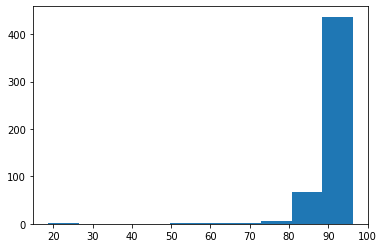

In [14]:
plt.hist(data['FFMC'])

Histogram of DMC

(array([ 63.,  63.,  49., 114., 113.,  42.,  25.,  23.,   9.,  16.]),
 array([  1.1 ,  30.12,  59.14,  88.16, 117.18, 146.2 , 175.22, 204.24,
        233.26, 262.28, 291.3 ]),
 <BarContainer object of 10 artists>)

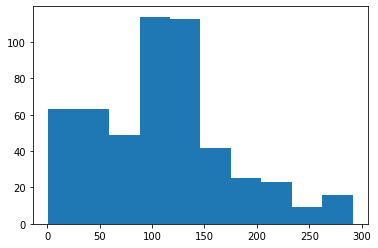

In [15]:
plt.hist(data['DMC']) 

Histogram of DC

(array([ 67.,  21.,   6.,  10.,  25.,  22.,  40., 136., 151.,  39.]),
 array([  7.9 ,  93.17, 178.44, 263.71, 348.98, 434.25, 519.52, 604.79,
        690.06, 775.33, 860.6 ]),
 <BarContainer object of 10 artists>)

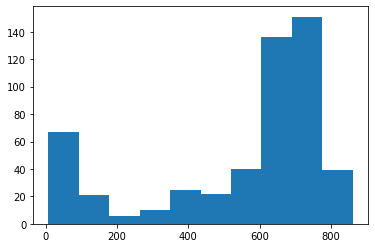

In [16]:
plt.hist(data['DC']) 

Histogram of ISI 

(array([ 83., 312.,  93.,  26.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  5.61, 11.22, 16.83, 22.44, 28.05, 33.66, 39.27, 44.88,
        50.49, 56.1 ]),
 <BarContainer object of 10 artists>)

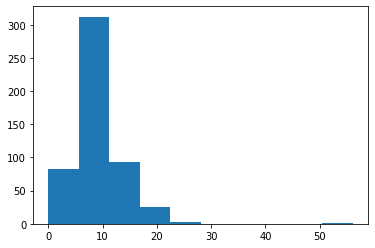

In [17]:
plt.hist(data['ISI']) 

Histogram of temp 

(array([ 18.,  11.,  31.,  47.,  92., 127.,  99.,  55.,  24.,  13.]),
 array([ 2.2 ,  5.31,  8.42, 11.53, 14.64, 17.75, 20.86, 23.97, 27.08,
        30.19, 33.3 ]),
 <BarContainer object of 10 artists>)

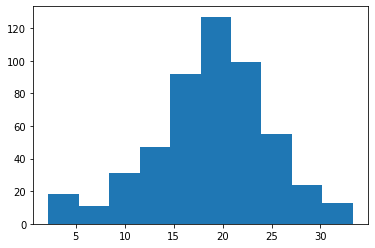

In [18]:
plt.hist(data['temp']) 

Histogram of RH 

(array([ 21.,  96., 130., 104.,  63.,  40.,  31.,  20.,   7.,   5.]),
 array([ 15. ,  23.5,  32. ,  40.5,  49. ,  57.5,  66. ,  74.5,  83. ,
         91.5, 100. ]),
 <BarContainer object of 10 artists>)

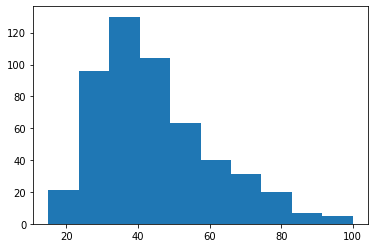

In [19]:
plt.hist(data['RH'])  

Histogram of wind 

(array([ 14.,  45.,  97.,  93.,  92., 113.,  19.,  26.,   5.,  13.]),
 array([0.4, 1.3, 2.2, 3.1, 4. , 4.9, 5.8, 6.7, 7.6, 8.5, 9.4]),
 <BarContainer object of 10 artists>)

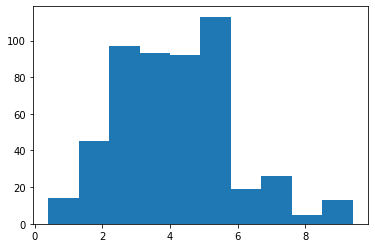

In [20]:
plt.hist(data['wind']) 

Histogram of rain 

(array([512.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.64, 1.28, 1.92, 2.56, 3.2 , 3.84, 4.48, 5.12, 5.76, 6.4 ]),
 <BarContainer object of 10 artists>)

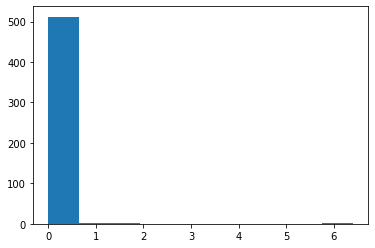

In [21]:
plt.hist(data['rain']) 

#### Scatter Plot

Scatter Plot of FFMC vs Area

<AxesSubplot:xlabel='FFMC', ylabel='area'>

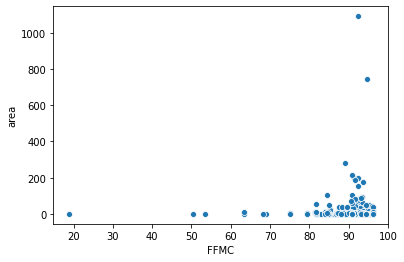

In [22]:
sns.scatterplot(x="FFMC", y= "area", data = data) 

Scatter Plot of DMC vs Area 

<AxesSubplot:xlabel='DMC', ylabel='area'>

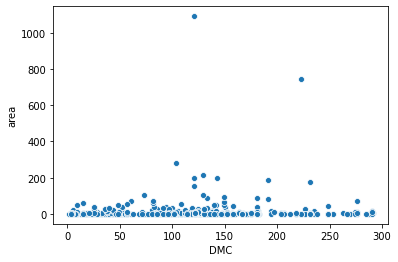

In [23]:
sns.scatterplot(x="DMC", y= "area", data = data)  

Scatter Plot of DC vs Area 

<AxesSubplot:xlabel='DC', ylabel='area'>

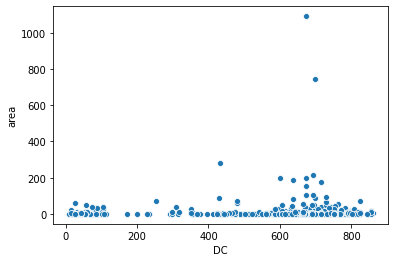

In [24]:
sns.scatterplot(x="DC", y= "area", data = data)  

Scatter Plot of ISI vs Area

<AxesSubplot:xlabel='ISI', ylabel='area'>

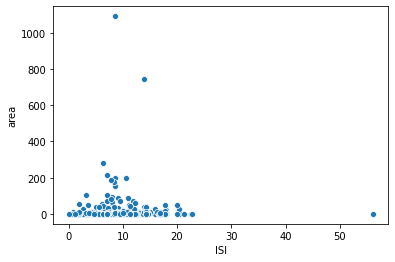

In [25]:
sns.scatterplot(x="ISI", y= "area", data = data) 

Scatter Plot of temp vs Area 

<AxesSubplot:xlabel='temp', ylabel='area'>

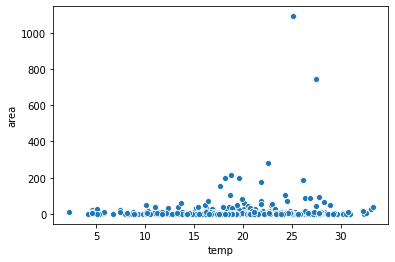

In [26]:
sns.scatterplot(x="temp", y= "area", data = data) 

Scatter Plot of RH vs Area

<AxesSubplot:xlabel='RH', ylabel='area'>

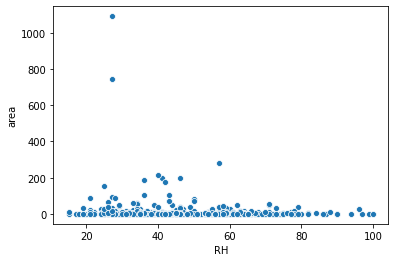

In [27]:
sns.scatterplot(x="RH", y= "area", data = data)  

Scatter Plot of wind vs Area

<AxesSubplot:xlabel='wind', ylabel='area'>

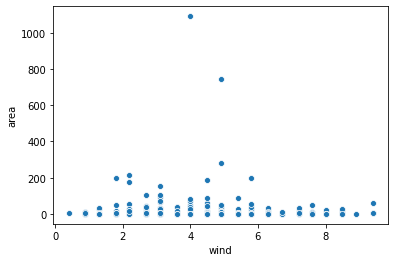

In [28]:
sns.scatterplot(x="wind", y= "area", data = data) 

Scatter Plot of rain vs Area

<AxesSubplot:xlabel='rain', ylabel='area'>

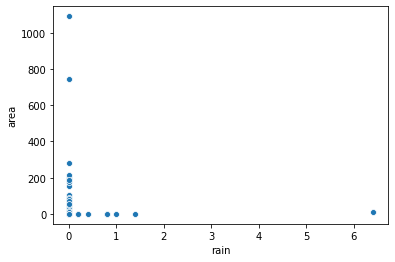

In [29]:
sns.scatterplot(x="rain", y= "area", data = data)  

#### HeatMap

<AxesSubplot:>

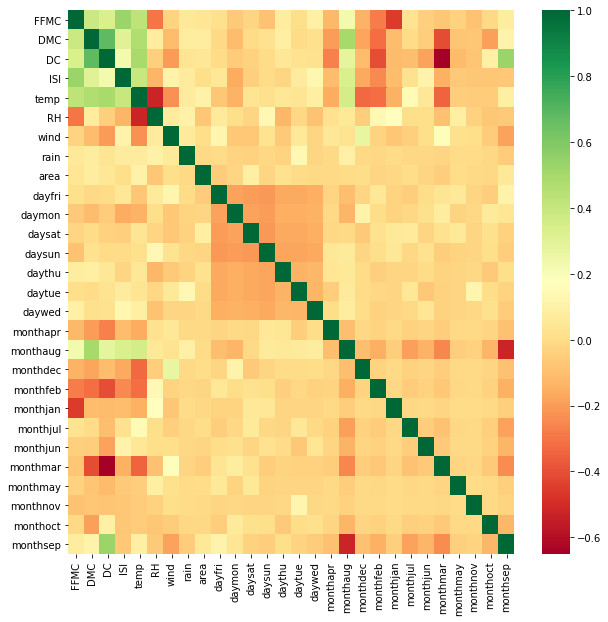

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap="RdYlGn") 

#### Visualizing Categorical Columns

Visualize the Month Column

<AxesSubplot:xlabel='count', ylabel='month'>

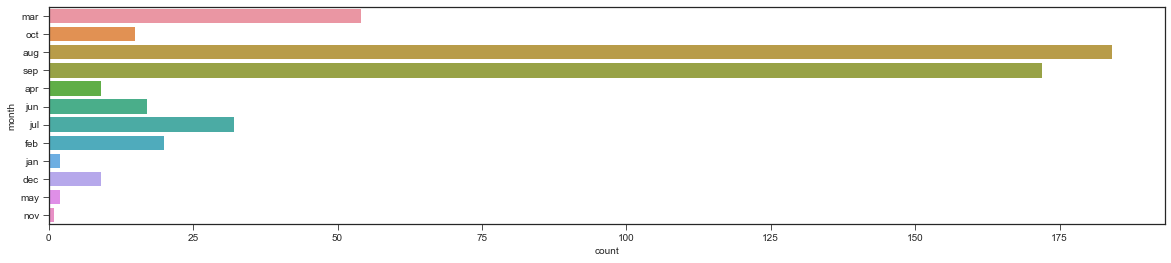

In [10]:
fig = plt.figure(figsize=(20,4))  
plt.style.use('seaborn-ticks')
sns.countplot(y="month", data=data)  

Visualize the Day Column 

<AxesSubplot:xlabel='count', ylabel='day'>

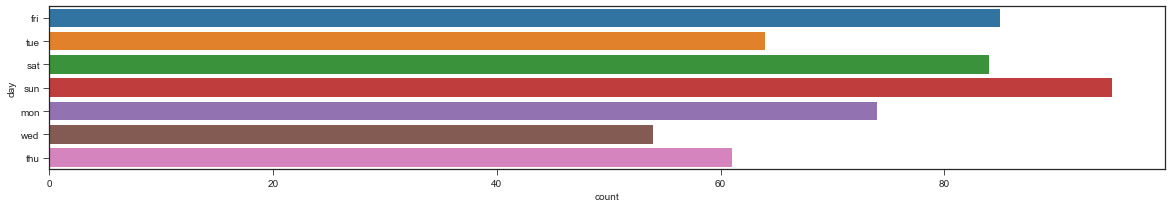

In [11]:
fig = plt.figure(figsize=(20,3))   
plt.style.use('seaborn-ticks')
sns.countplot(y="day", data=data)  

Visualize the size_category Column

<AxesSubplot:xlabel='count', ylabel='size_category'>

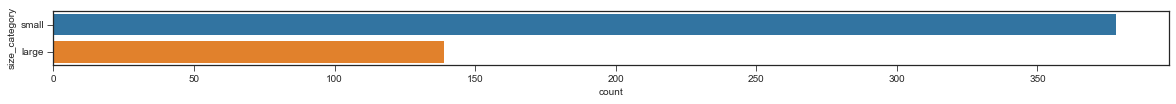

In [12]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="size_category", data=data) 

#### Encode Categorical Data

Unique Values of Month Column 

In [13]:
data['month'].unique()  

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

Convert Categorical Values of Month Column in Numerical 

In [14]:
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True) 

Unique Values of Day Column 

In [15]:
data['day'].unique() 

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

Convert Categorical Values of Day in Numerical

In [16]:
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True) 

Unique Values of size_category Column 

In [17]:
data['size_category'].unique() 

array(['small', 'large'], dtype=object)

Convert Categorical Value of size_category Column in Numerical 

In [18]:
data.size_category.replace(('small','large'),(0,1), inplace=True) 

In [19]:
data.head() 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0


#### Normalization the Data 

In [20]:
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)

predictors = data.iloc[:,0:28]
target = data.iloc[:,28]

predictors1 = norm_func(predictors) 

#### Split the Dataset in Traning Set and Test Set  

In [21]:
x_train,x_test,y_train,y_test=train_test_split(predictors1,target, test_size=0.2,stratify=target)

In [22]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model

In [23]:
X= np.asarray(x_train).astype(np.float32)
Y= np.asarray(y_train).astype(np.float32)

In [24]:
first_model = prep_model([28,50,40,20,1])
first_model.fit(X,Y,epochs=500)
pred_train = first_model.predict(np.array(x_train))

Epoch 1/500
413/413 [==============================] - 0s 426us/step - loss: 0.6547 - accuracy: 0.8257
Epoch 2/500
413/413 [==============================] - 0s 75us/step - loss: 0.4965 - accuracy: 0.9709
Epoch 3/500
413/413 [==============================] - 0s 73us/step - loss: 0.2957 - accuracy: 0.9709
Epoch 4/500
413/413 [==============================] - 0s 80us/step - loss: 0.1705 - accuracy: 0.9709
Epoch 5/500
413/413 [==============================] - 0s 80us/step - loss: 0.1327 - accuracy: 0.9709
Epoch 6/500
413/413 [==============================] - 0s 85us/step - loss: 0.1241 - accuracy: 0.9709
Epoch 7/500
413/413 [==============================] - 0s 77us/step - loss: 0.1226 - accuracy: 0.9709
Epoch 8/500
413/413 [==============================] - 0s 70us/step - loss: 0.1184 - accuracy: 0.9709
Epoch 9/500
413/413 [==============================] - 0s 87us/step - loss: 0.1167 - accuracy: 0.9709
Epoch 10/500
413/413 [==============================] - 0s 77us/step - loss: 0.11

413/413 [==============================] - 0s 70us/step - loss: 2.6719e-04 - accuracy: 1.0000
Epoch 81/500
413/413 [==============================] - 0s 70us/step - loss: 2.7179e-04 - accuracy: 1.0000
Epoch 82/500
413/413 [==============================] - 0s 75us/step - loss: 2.4815e-04 - accuracy: 1.0000
Epoch 83/500
413/413 [==============================] - 0s 77us/step - loss: 2.2596e-04 - accuracy: 1.0000
Epoch 84/500
413/413 [==============================] - 0s 75us/step - loss: 2.2941e-04 - accuracy: 1.0000
Epoch 85/500
413/413 [==============================] - 0s 75us/step - loss: 2.6765e-04 - accuracy: 1.0000
Epoch 86/500
413/413 [==============================] - 0s 77us/step - loss: 2.5192e-04 - accuracy: 1.0000
Epoch 87/500
413/413 [==============================] - 0s 68us/step - loss: 1.3076e-04 - accuracy: 1.0000
Epoch 88/500
413/413 [==============================] - 0s 70us/step - loss: 2.1524e-04 - accuracy: 1.0000
Epoch 89/500
413/413 [============================

413/413 [==============================] - 0s 82us/step - loss: 1.5202e-05 - accuracy: 1.0000
Epoch 156/500
413/413 [==============================] - 0s 82us/step - loss: 7.3065e-07 - accuracy: 1.0000
Epoch 157/500
413/413 [==============================] - ETA: 0s - loss: 2.7284e-07 - accuracy: 1.00 - 0s 82us/step - loss: 2.0653e-07 - accuracy: 1.0000
Epoch 158/500
413/413 [==============================] - 0s 85us/step - loss: 1.7076e-07 - accuracy: 1.0000
Epoch 159/500
413/413 [==============================] - 0s 87us/step - loss: 1.4714e-07 - accuracy: 1.0000
Epoch 160/500
413/413 [==============================] - 0s 82us/step - loss: 1.5010e-07 - accuracy: 1.0000
Epoch 161/500
413/413 [==============================] - 0s 82us/step - loss: 1.2671e-07 - accuracy: 1.0000
Epoch 162/500
413/413 [==============================] - 0s 82us/step - loss: 1.1584e-07 - accuracy: 1.0000
Epoch 163/500
413/413 [==============================] - 0s 85us/step - loss: 1.1027e-05 - accuracy: 1.0

413/413 [==============================] - 0s 82us/step - loss: 2.0547e-08 - accuracy: 1.0000
Epoch 231/500
413/413 [==============================] - 0s 80us/step - loss: 8.4127e-08 - accuracy: 1.0000
Epoch 232/500
413/413 [==============================] - 0s 82us/step - loss: 2.5758e-09 - accuracy: 1.0000
Epoch 233/500
413/413 [==============================] - 0s 87us/step - loss: 2.2492e-09 - accuracy: 1.0000
Epoch 234/500
413/413 [==============================] - 0s 80us/step - loss: 2.1607e-09 - accuracy: 1.0000
Epoch 235/500
413/413 [==============================] - 0s 75us/step - loss: 2.0933e-09 - accuracy: 1.0000
Epoch 236/500
413/413 [==============================] - 0s 73us/step - loss: 1.7555e-09 - accuracy: 1.0000
Epoch 237/500
413/413 [==============================] - 0s 68us/step - loss: 1.6545e-09 - accuracy: 1.0000
Epoch 238/500
413/413 [==============================] - 0s 70us/step - loss: 2.1212e-09 - accuracy: 1.0000
Epoch 239/500
413/413 [===================

Epoch 306/500
413/413 [==============================] - 0s 90us/step - loss: 7.6719e-10 - accuracy: 1.0000
Epoch 307/500
413/413 [==============================] - 0s 90us/step - loss: 6.9352e-10 - accuracy: 1.0000
Epoch 308/500
413/413 [==============================] - 0s 85us/step - loss: 6.5935e-10 - accuracy: 1.0000
Epoch 309/500
413/413 [==============================] - 0s 90us/step - loss: 6.8310e-10 - accuracy: 1.0000
Epoch 310/500
413/413 [==============================] - 0s 97us/step - loss: 6.3785e-10 - accuracy: 1.0000
Epoch 311/500
413/413 [==============================] - 0s 70us/step - loss: 7.3775e-10 - accuracy: 1.0000
Epoch 312/500
413/413 [==============================] - 0s 75us/step - loss: 6.9915e-10 - accuracy: 1.0000
Epoch 313/500
413/413 [==============================] - 0s 73us/step - loss: 6.7701e-10 - accuracy: 1.0000
Epoch 314/500
413/413 [==============================] - 0s 73us/step - loss: 6.8078e-10 - accuracy: 1.0000
Epoch 315/500
413/413 [=====

413/413 [==============================] - 0s 68us/step - loss: 5.4881e-10 - accuracy: 1.0000
Epoch 382/500
413/413 [==============================] - 0s 70us/step - loss: 5.6879e-10 - accuracy: 1.0000
Epoch 383/500
413/413 [==============================] - 0s 73us/step - loss: 5.6678e-10 - accuracy: 1.0000
Epoch 384/500
413/413 [==============================] - 0s 63us/step - loss: 6.1581e-10 - accuracy: 1.0000
Epoch 385/500
413/413 [==============================] - 0s 73us/step - loss: 6.1180e-10 - accuracy: 1.0000
Epoch 386/500
413/413 [==============================] - 0s 70us/step - loss: 5.9034e-10 - accuracy: 1.0000
Epoch 387/500
413/413 [==============================] - 0s 77us/step - loss: 5.4956e-10 - accuracy: 1.0000
Epoch 388/500
413/413 [==============================] - 0s 73us/step - loss: 5.6588e-10 - accuracy: 1.0000
Epoch 389/500
413/413 [==============================] - 0s 70us/step - loss: 5.7380e-10 - accuracy: 1.0000
Epoch 390/500
413/413 [===================

Epoch 457/500
413/413 [==============================] - 0s 97us/step - loss: 5.1922e-10 - accuracy: 1.0000
Epoch 458/500
413/413 [==============================] - 0s 90us/step - loss: 5.5273e-10 - accuracy: 1.0000
Epoch 459/500
413/413 [==============================] - 0s 107us/step - loss: 5.6453e-10 - accuracy: 1.0000
Epoch 460/500
413/413 [==============================] - 0s 119us/step - loss: 5.2131e-10 - accuracy: 1.0000
Epoch 461/500
413/413 [==============================] - 0s 90us/step - loss: 4.9172e-10 - accuracy: 1.0000
Epoch 462/500
413/413 [==============================] - 0s 114us/step - loss: 4.8913e-10 - accuracy: 1.0000
Epoch 463/500
413/413 [==============================] - 0s 99us/step - loss: 5.1975e-10 - accuracy: 1.0000
Epoch 464/500
413/413 [==============================] - 0s 82us/step - loss: 5.8723e-10 - accuracy: 1.0000
Epoch 465/500
413/413 [==============================] - 0s 80us/step - loss: 5.4131e-10 - accuracy: 1.0000
Epoch 466/500
413/413 [==